# A simple function with different types of input parameters which are optimized.

In [1]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform


param_dict = {"a": uniform(0, 1), # uniform distribution
              "b": range(1,5), # Integer variable
              "c":[1,2,3], # Integer variable
              "d":["-1","1"] # Categorical variable
             }


# userObjective

In [3]:
def objectiveFunction(args_list):
    results = []
    for hyper_par in args_list:
        a = hyper_par['a']
        b = hyper_par['b']
        c = hyper_par['c']
        d = hyper_par['d']
        result = (a + b + c + int(d))
        results.append(result)
    return results

# Defining Tuner

In [4]:
tuner_user = Tuner(param_dict, objectiveFunction)

In [5]:
tuner_user.getConf()

{'param_dict': {'a': <scipy.stats._distn_infrastructure.rv_frozen at 0x1a16511748>,
  'b': range(1, 5),
  'c': [1, 2, 3],
  'd': ['-1', '1']},
 'userObjective': <function __main__.objectiveFunction(args_list)>,
 'domain_size': 5000,
 'initial_random': 1,
 'num_iteration': 20,
 'objective': 'maximize',
 'batch_size': 1}

In [6]:
results = tuner_user.maximize()

# Inspect the results

In [7]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'a': 0.9927614013378501, 'b': 4, 'c': 3, 'd': '1'}
best objective: 8.99276140133785


In [8]:
print('Sample hyper parameters tried:',len(results['params_tried']))
print(results['params_tried'][:2])

Sample hyper parameters tried: 21
[{'a': 0.005071139952175563, 'b': 3, 'c': 3, 'd': '1'}, {'a': 0.9972480911053926, 'b': 1, 'c': 1, 'd': '-1'}]


In [9]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 21
[7.005071139952175, 1.9972480911053925, 6.800145186227058, 4.996649174738751, 3.013659210669476]


# Plotting the variation in objective values of the tried results

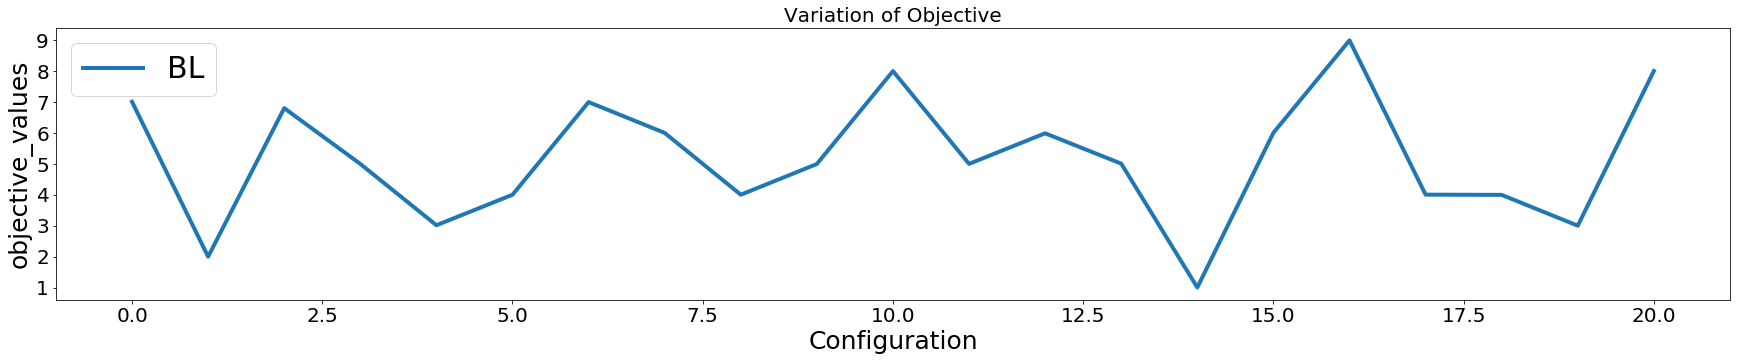

In [11]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

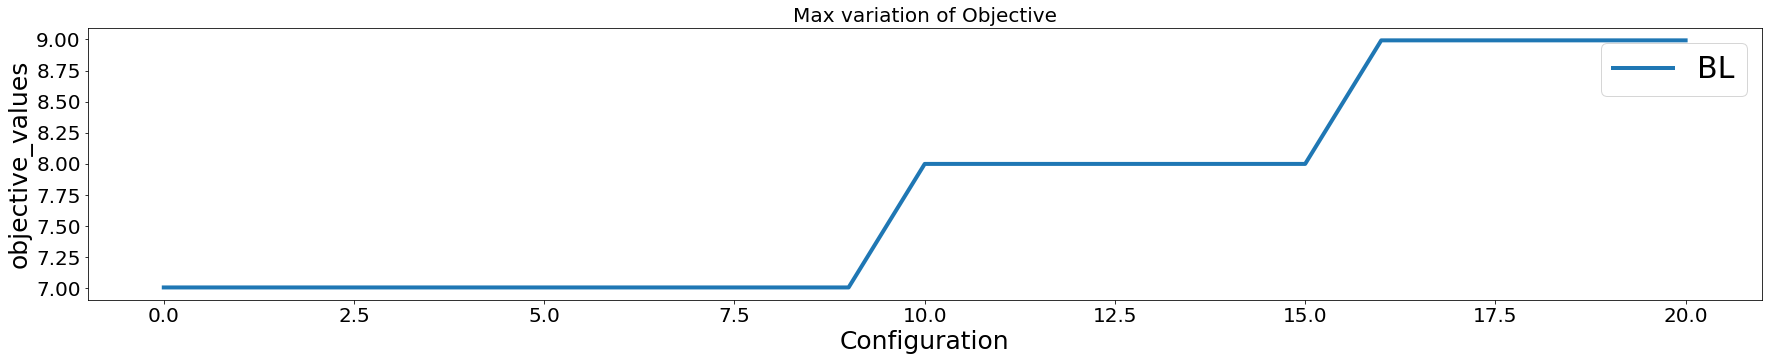

In [12]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the result

In [13]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': 8.99276140133785,
    'best_params': {'a': 0.9927614013378501, 'b': 4, 'c': 3, 'd': '1'},
    'objective_values': [   7.005071139952175,
                            1.9972480911053925,
                            6.800145186227058,
                            4.996649174738751,
                            3.013659210669476,
                            4.000281973534419,
                            6.996863762380272,
                            6.0002204621454025,
                            4.001367102517807,
                            4.993327939348697,
                            7.998791427970269,
                            4.998454164405459,
                            5.987632209866577,
                            5.005675587034055,
                            1.0022374496604165,
                            6.003869684669556,
                            8.99276140133785,
                            4.0030223285786395,
                            3.995620808